딥러닝 파이토치 교과서
ch7. 1-3
 p.360~371

# CH 7. 시계열 분석
## 7.1 시계열 문제

시계열 문제 : 시간에 따라 변하는 데이터를 사용하여 추이를 분석하기
- 주가/환율 변동, 기온/습도 변화 등
- 추세를 파악하거나 향후 전망 등을 예측하기 위한 용도로 사용

시계열 형태
- 불규칙 변동 : 시간에 따른 규칙적인 움직임과 달리 어떤 규칙성이 없어 예측 불가능하고 우연적으로 발생하는 변동
- 추세 변동 : 시계열 자료가 갖는 장기적인 변화 추세, 짧은 기간 동안에는 추세 변동을 찾기 어려움
- 순환 변동 : 대체로 2-3년 정도의 일정한 기간을 주기로 순환적으로 나타나는 변동, 1년 이내 주기로 곡선을 그리며 추세 변동에 따라 변동하는 것
- 계절 변동 : 계절적 영향과 사회적 관습에 따라 1년 주기로 발생하는 것, 계절에 따라 순환하며 변동

시계열 데이터
- 규칙적 시계열 : 트렌드와 분산이 불변하는 데이터
- 불규칙적 시계열 : 트렌드 혹은 분산이 변화하는 시계열 데이터

## 7.2 AR, MA, ARMA, ARIMA

시계열 분석
- 독립 변수를 사용하여 종속 변수를 예측하는 일반적인 머신 러닝에서 시간을 독립 변수로 사용

### 7.2.1 AR 모델

AR (자기 회귀) 모델 : 이전 관측 값이 이후 관측 값에 영향을 준다는 아이디어에 대한 모형으로 자기 회귀 모델
- 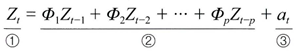
- 1. 시계열 데이터에서 현재 시점을 의미
- 2. 과거가 현재에 미치는 영향을 나타내는 모수에 시계열 데이터의 과거 시점을 곱한 것
- 3. 시계열 분석에서 오차 항을 의미하여 백색 잡음


### 7.2.2 MA 모델
MA (이동 평균) 모델 : 트렌드가 변화하는 상황에 적합한 회귀 모델
- 윈도우 : 시계열을 따라 윈도우 크기만큼 슬라이싱되어서 이동 평균 모델이라고 함
- 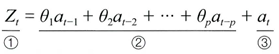
- 1. 시계열 데이터에서 현재 시점을 의미
- 2. 매개변수에 과거 시점의 오차를 곱한 것
- 3. 오차 항

=> 이전 데이터의 오차에서 현재 데이터의 상태를 추론

### 7.2.3 ARMA 모델
ARMA (자기 회귀 이동 평균) 모델 : AR과 MA를 섞은 모델로 연구 기관에서 주로 사용
- AR, MA 두 가지 관점에서 과거의 데이터를 사용하는 것
- 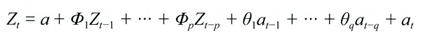

### 7.2.4 ARIMA 모델
ARIMA(자기 회귀 누적 이동 평균) 모델 : 자기 회귀와 이동 평균을 둘 다 고려하는 모형
- 과거 데이터의 선형 관계뿐만 아니라 추세까지 고려한 모델
1. ARIMA() 함수 호출 : ARIMA(p,d,q)
- p : 자기 회귀 차수, d : 차분 차수, q : 이동 평균 차수
- ARIMA(5,1,0) 사용 : 이동 평균 차수 0 => 시계열 정지 상태로 만들기
2. fit() 메서드 호출하고 모델에 데이터를 적용하여 훈련시키기
3. predict() 메서드를 호출하여 미래의 추세 및 동향에 대해 예측

ARIMA() 함수를 호출하여 sales 데이터셋에 대한 예측

<ipython-input-5-d431f77be1b1>:11: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/2025-1/2025-1 ESAA OB/과제/data/sales.csv',
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -199.651
Date:                Fri, 23 May 2025   AIC                            411.302
Time:                        09:20:03   BIC                            420.634
Sample:                    01-01-1991   HQIC                           414.523
                         - 12-01-1993                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8788      0.227     -3.876      0.000      -1.323      -0.434
ar.L2         -0.2787      0.232     -1.203      0.229      -0.733       0.176
ar.L3         -0.0076      0.270     -0.028      0.9

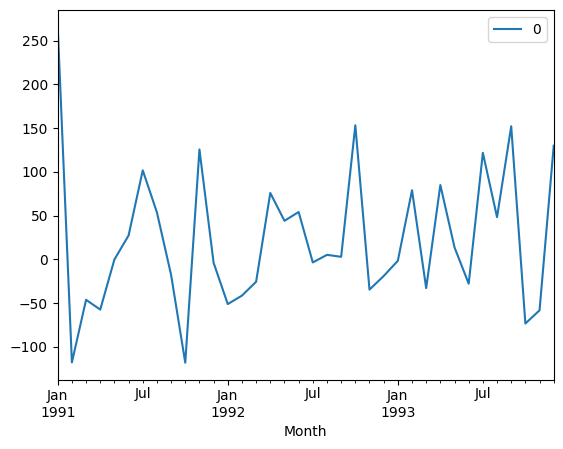

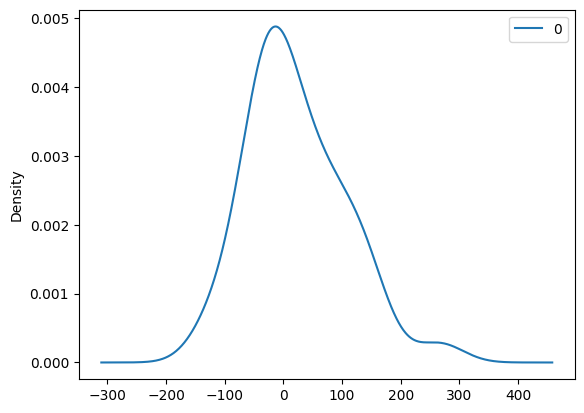

                0
count   36.000000
mean    22.459086
std     82.505331
min   -118.213281
25%    -33.308343
50%      1.361178
75%     76.704967
max    266.000000


In [5]:
from pandas import read_csv
from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

def parser(x) : # 시간을 표현하는 함수 정의
    return datetime.strptime('199'+x, '%Y-%m')
    # strptime()은 날짜와 시간 정보를 문자열로 바꿔주는 메서드

series = read_csv('/content/drive/MyDrive/2025-1/2025-1 ESAA OB/과제/data/sales.csv',
                  header = 0, parse_dates = [0], index_col=0, date_parser=parser).squeeze('columns')
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit() # 모형을 적용할 때 많은 디버그 정보가 제공되는데 disp 인수를 0으로 설정하여 이 기능을 비활성화
print(model_fit.summary()) # 모델에 대한 정보 표시
residuals = DataFrame(model_fit.resid) # DataFrame에 모델에 대한 오차 정보를 residuals라는 변수에 저장
residuals.plot() # residuals 정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

=> sales 데이터셋에 대한 정보
- 오류 분포가 표시 : 값이 치우쳐 있음

ARIMA() 함수를 사용한 예측 진행

statsmodels 라이브러리를 이용한 sales 데이터셋 예측

<ipython-input-6-0a0c7bcbdddf>:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = read_csv('/content/drive/MyDrive/2025-1/2025-1 ESAA OB/과제/data/sales.csv',


predicted=352.855343, expected=346.300000
predicted=277.398036, expected=329.700000
predicted=368.753734, expected=445.400000
predicted=331.773635, expected=325.900000
predicted=372.070407, expected=449.300000
predicted=360.020872, expected=411.300000
predicted=454.526230, expected=417.400000
predicted=388.690699, expected=545.500000
predicted=437.632447, expected=477.600000
predicted=516.437624, expected=687.000000
predicted=520.916191, expected=435.300000
predicted=675.594647, expected=587.300000
predicted=505.201016, expected=676.900000
Test MSE: 9118.818


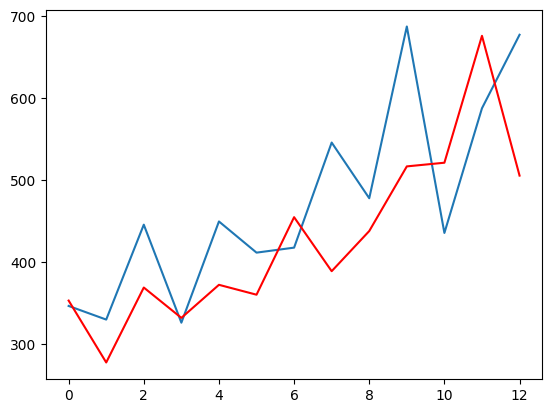

In [6]:
import numpy as np
from pandas import read_csv
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
  return datetime.strptime('199'+x, '%Y-%m')

series = read_csv('/content/drive/MyDrive/2025-1/2025-1 ESAA OB/과제/data/sales.csv',
                  header = 0, parse_dates = [0], index_col=0, date_parser=parser).squeeze('columns')

X = series.values
X = np.nan_to_num(X)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)] # train과 test 데이터셋 분리
history = [x for x in train]
predictions = list()

for t in range(len(test)): # test 데이터셋의 길이(13)만큼 반복하여 수행
  model=ARIMA(history, order=(5,1,0)) # ARIMA() 함수 호출
  model_fit = model.fit()
  output = model_fit.forecast() # forecast() 메서드를 사용하여 예측 수행
  yhat = output[0] # 모델 출력 결과를 yhat에 저장
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))
  # 모델 실행 결과를 predicted로 출력하고 test로 분리해 둔 데이터를 expected로 사용하여 출력

error = mean_squared_error(test, predictions) # 손실 함수로 평균 제곱 오차 사용
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



=> 실제 데이터 (빨간색)과 모형 실행 결과 (파란색) 표시한 그림
- 데이터가 우상향 추세
- 자전거 판매가 향후에도 계속 증가할 것임을 예측

## 7.3 순환 신경망 (RNN)

RNN : 시간적으로 연속성이 있는 데이터를 처리하려고 고안된 인공 신경망
- 새로운 입력이 네트워크로 들어올 때마다 현재까지 입력 데이터를 요약한 정보가 조금씩 수정됨
- 최종적으로 남겨진 기억은 모든 입력 전체를 요약한 정보가 됨
- 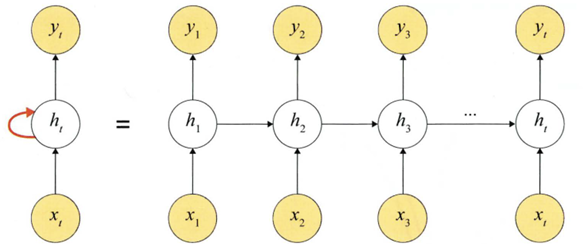


RNN의 입력과 출력에 따른 유형
- 일대일 : 순환이 없기에 RNN이라고 하기 어려움, 순방향 네트워크
- 일대다 : 입력이 하나이고 출력이 다수인 구조, 이미지를 입력해서 이미지에 대한 설명을 문장으로 출력하는 이미지 캡션
- 다대일 : 입력이 다수이고 출력이 하나인 구조, 문장을 입력해서 긍정/부정을 출력하는 감성 분석기에서 사용됨



```
self.em = nn.Embedding(len(TEXT.vocab.stoi), embeding_dim) # 임베딩 처리
self.rnn = nn.RNNCell(input_dim, hidden_size) # RNN 적용
self.fc1 = nn.Linear(hidden_size, 256) # 완전연결층
self.fc2 = nn.Linear(256, 3) # 출력층
```

- 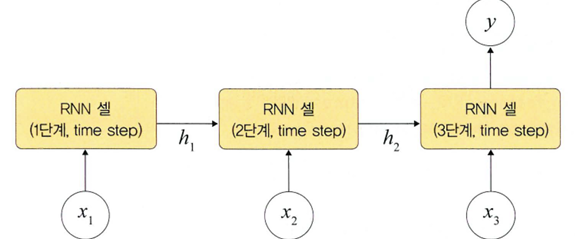

- 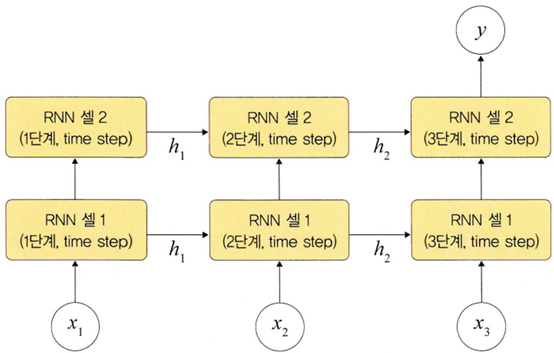

- 다대다 : 입력과 출력이 다수인 구조, 언어를 번역하는 자동 번역기 등
- 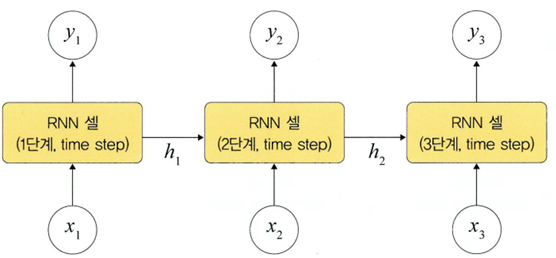

- 동기화 다대다 : 입력과 출력이 다수인 구조, 문장에서 다음에 나올 단어를 에측하는 언어 모델, 프레임 수준의 비디오 분류
- 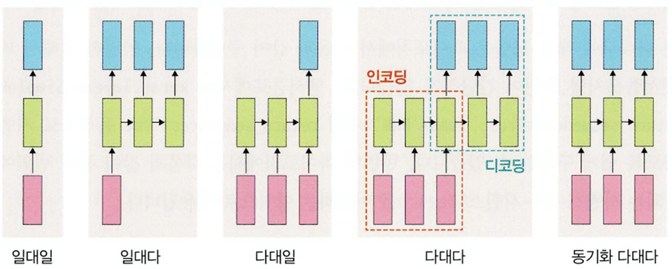

### 7.3.1 RNN 계층과 셀
RNN
- 내장된 계층뿐만 아니라 셀 레벨의 API도 제공
- RNN 계층 : 입력된 배치 순서대로 모두 처리
- RNN 셀 : 오직 하나의 단계만 처리, RNN 계층의 for loop 구문을 갖는 구조
- 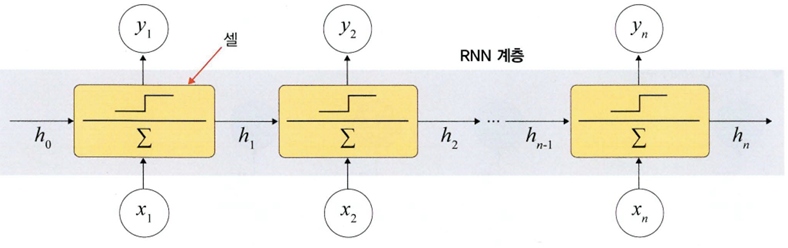

RNN 셀 유형
- nn.RNNCell : SimpleRNN 계층에 대응되는 RNN 셀
- nn.GRUCell : GRU 계층에 대응되는 GRU 셀
- nn.LSTMCell : LSTM 계층에 대응되는 LSTM 셀